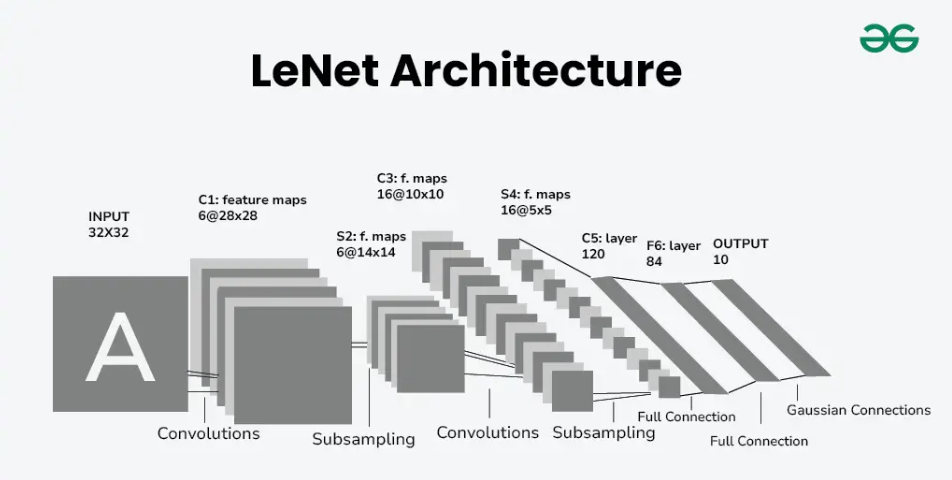


In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from keras.models import Sequential
from keras.optimizers import Adam

## Load Data and reshape it for compatible with the convolution layers

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## One Hot encode

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Create model

In [19]:
model = Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=120, kernel_size=(5, 5), activation='relu', padding='same'),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model compile and fit

In [20]:
model.compile(optimizer=Adam(), loss=keras.metrics.categorical_crossentropy, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=120, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.8498 - loss: 0.5105 - val_accuracy: 0.9759 - val_loss: 0.0743
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9790 - loss: 0.0676 - val_accuracy: 0.9853 - val_loss: 0.0452


In [22]:
score = model.evaluate(X_test, y_test)
print('Loss: ', score[0])
print('Accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9817 - loss: 0.0543
Loss:  0.04519406333565712
Accuracy:  0.9853000044822693
